# Predicting TOC values 

### loading libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
coreData=pd.read_csv('CoreDataSynthetic.csv')

In [3]:
coreData.head()

,Well,CRC Lib #,Formation,Sample Type,GR,ILD,Porosity,HCl Reaction,Avg. Depth,Leco TOC (%),S1,S2,S3,Tmax (°C),HI,OI,S1+S2,PI
0,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,0.55,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,Buffalo Gap Federal 35-1,T120,MWRY,core,143.767142,28.198080,7.190913,1,11118.1,0.96,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,0.55,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,0.55,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,0.55,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [4]:
mainData=pd.read_csv('TrainingDataTOC.csv')

In [5]:
mainData.head()

,Well,CRC Lib #,Formation,Sample Type,GR,ILD,Porosity,HCl Reaction,Avg. Depth,Leco TOC (%),S1,S2,S3,Tmax (°C),HI,OI,S1+S2,PI
0,Buffalo Gap Federal 35-1,T120,FRNR,core,120.992756,17.895352,6.406021,1.0,11029.70,1.90,0.48,2.45,0.16,451.0,129.0,8.0,2.93,0.16
1,Buffalo Gap Federal 35-1,T120,MWRY,core,130.195254,23.630048,8.799609,1.0,11074.70,1.68,0.66,2.49,0.11,452.0,148.0,7.0,3.15,0.21
2,Buffalo Gap Federal 35-1,T120,MWRY,core,138.980399,38.257813,9.401198,1.0,11154.60,0.68,0.58,1.01,0.23,449.0,149.0,34.0,1.59,0.36
3,Buffalo Gap Federal 35-1,T120,MWRY,core,132.187212,51.405548,10.000000,1.0,11161.50,2.89,0.99,5.15,0.25,448.0,178.0,9.0,6.14,0.16
4,Buffalo Gap Federal 35-1,T120,MWRY,core,142.613492,44.098333,7.704591,1.0,11225.15,2.61,2.29,5.48,0.12,448.0,210.0,5.0,7.77,0.29


In [6]:
coreData.describe()

,GR,ILD,Porosity,HCl Reaction,Avg. Depth,Leco TOC (%),S1,S2,S3,Tmax (°C),HI,OI,S1+S2,PI
count,3000.000000,3000.000000,2999.000000,3000.0,3000.000000,3000.000000,2773.000000,2772.000000,2775.000000,2775.000000,2775.000000,2775.000000,3000.000000,2769.000000
mean,144.781161,33.155711,13.578724,1.0,10710.086683,2.156821,0.868997,6.008853,0.278613,440.650688,239.149603,19.222704,6.317770,0.184770
std,34.761937,64.994048,5.586397,0.0,799.919247,3.004986,0.983691,7.946471,0.350437,45.600467,122.821753,30.616379,8.287584,0.166038
min,31.991913,2.399435,5.607974,1.0,6058.000000,0.110000,0.010000,0.090000,0.060000,0.070000,0.740000,2.000000,0.000000,0.010000
25%,127.560000,10.453300,8.480000,1.0,10613.700000,1.280000,0.180000,2.120000,0.190000,441.000000,142.000000,8.000000,2.680000,0.030000
50%,141.570102,17.455600,11.456972,1.0,10663.700000,1.900000,0.480000,4.360000,0.240000,444.000000,235.000000,11.000000,4.860000,0.130000
75%,157.683500,30.067157,18.930000,1.0,11183.900000,2.500000,1.380000,7.980000,0.310000,450.000000,337.000000,20.000000,7.780000,0.380000
max,267.666300,511.917371,40.355704,1.0,12679.500000,41.200000,8.590000,96.180000,7.470000,463.000000,586.000000,257.000000,104.770000,0.480000


In [7]:
mainData.describe()

,GR,ILD,Porosity,HCl Reaction,Avg. Depth,Leco TOC (%),S1,S2,S3,Tmax (°C),HI,OI,S1+S2,PI
count,188.000000,188.000000,187.000000,188.0,188.000000,188.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,188.000000,179.000000
mean,140.826089,37.747589,14.526079,1.0,10325.223404,2.470489,0.969392,6.405691,0.355414,427.038674,234.440387,21.150467,7.040851,0.172550
std,35.162507,81.337623,6.805427,0.0,1106.338226,3.404865,1.097214,8.533981,0.715017,86.043590,128.464781,38.009663,9.095806,0.145463
min,31.991913,2.399435,5.607974,1.0,6058.000000,0.110000,0.010000,0.090000,0.060000,0.070000,0.740000,2.000000,0.000000,0.010000
25%,124.717025,7.935576,8.584897,1.0,9894.100000,1.377500,0.190000,2.120000,0.180000,441.000000,142.000000,8.000000,2.795000,0.030000
50%,139.142807,13.296753,13.406179,1.0,10629.050000,2.130000,0.480000,4.840000,0.240000,443.000000,222.000000,11.000000,5.855000,0.150000
75%,157.099303,26.452862,19.185000,1.0,11040.950000,2.622500,1.440000,8.050000,0.310000,448.000000,329.000000,19.000000,8.405000,0.290000
max,267.666300,511.917371,55.472478,1.0,12679.500000,41.200000,8.590000,96.180000,7.470000,463.000000,586.000000,257.000000,104.770000,0.480000


## Data Exploration Stage

In [8]:
mainData.dtypes

Well             object
CRC Lib #        object
Formation        object
Sample Type      object
GR              float64
ILD             float64
Porosity        float64
HCl Reaction    float64
Avg. Depth      float64
Leco TOC (%)    float64
S1              float64
S2              float64
S3              float64
Tmax (°C)       float64
HI              float64
OI              float64
S1+S2           float64
PI              float64
dtype: object

In [9]:
mainData.shape

(190, 18)

In [10]:
mainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Well          188 non-null    object 
 1   CRC Lib #     188 non-null    object 
 2   Formation     188 non-null    object 
 3   Sample Type   188 non-null    object 
 4   GR            188 non-null    float64
 5   ILD           188 non-null    float64
 6   Porosity      187 non-null    float64
 7   HCl Reaction  188 non-null    float64
 8   Avg. Depth    188 non-null    float64
 9   Leco TOC (%)  188 non-null    float64
 10  S1            181 non-null    float64
 11  S2            181 non-null    float64
 12  S3            181 non-null    float64
 13  Tmax (°C)     181 non-null    float64
 14  HI            181 non-null    float64
 15  OI            181 non-null    float64
 16  S1+S2         188 non-null    float64
 17  PI            179 non-null    float64
dtypes: float64(14), object(4)
memo

In [11]:
coreData.dtypes

Well             object
CRC Lib #        object
Formation        object
Sample Type      object
GR              float64
ILD             float64
Porosity        float64
HCl Reaction      int64
Avg. Depth      float64
Leco TOC (%)    float64
S1              float64
S2              float64
S3              float64
Tmax (°C)       float64
HI              float64
OI              float64
S1+S2           float64
PI              float64
dtype: object

In [12]:
coreData.shape

(3000, 18)

In [13]:
coreData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Well          2999 non-null   object 
 1   CRC Lib #     3000 non-null   object 
 2   Formation     3000 non-null   object 
 3   Sample Type   3000 non-null   object 
 4   GR            3000 non-null   float64
 5   ILD           3000 non-null   float64
 6   Porosity      2999 non-null   float64
 7   HCl Reaction  3000 non-null   int64  
 8   Avg. Depth    3000 non-null   float64
 9   Leco TOC (%)  3000 non-null   float64
 10  S1            2773 non-null   float64
 11  S2            2772 non-null   float64
 12  S3            2775 non-null   float64
 13  Tmax (°C)     2775 non-null   float64
 14  HI            2775 non-null   float64
 15  OI            2775 non-null   float64
 16  S1+S2         3000 non-null   float64
 17  PI            2769 non-null   float64
dtypes: float64(13), int64(1), ob

In [14]:
coreData.columns

Index(['Well', 'CRC Lib #', 'Formation', 'Sample Type', 'GR', 'ILD',
       'Porosity', 'HCl Reaction', 'Avg. Depth', 'Leco TOC (%)', 'S1 ', 'S2 ',
       'S3', 'Tmax (°C)', 'HI', 'OI', 'S1+S2', 'PI'],
      dtype='object')

## Visualization Distributions

#### Histogram and kernel distributions

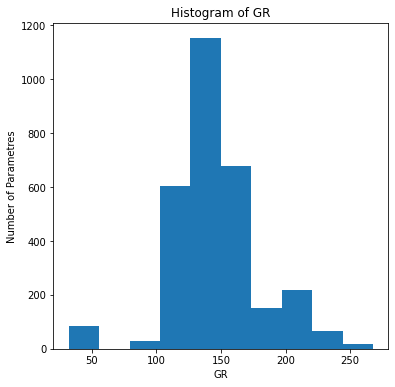

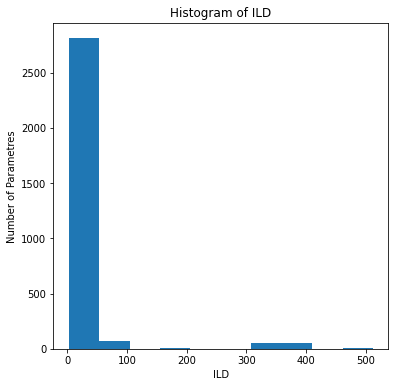

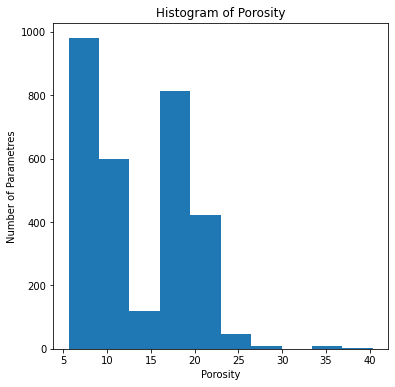

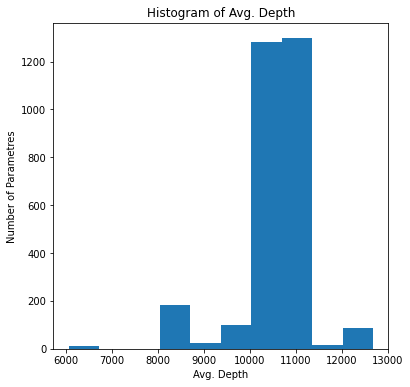

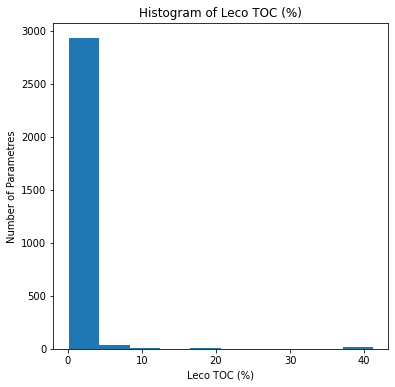

In [15]:
def plot_histogram(coreData, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        coreData[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of Parametres')# Set text for y axis
        plt.show()
        
num_cols = ['GR', 'ILD', 'Porosity','Avg. Depth', 'Leco TOC (%)']    
plot_histogram(coreData, num_cols)

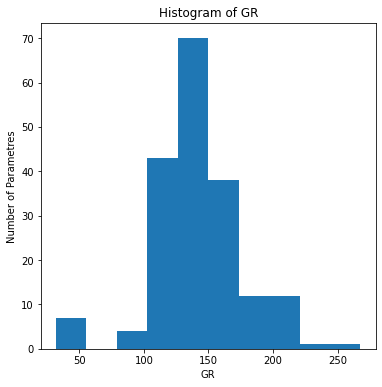

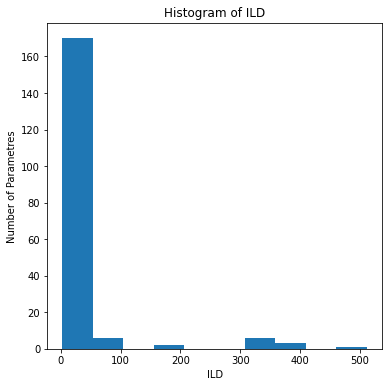

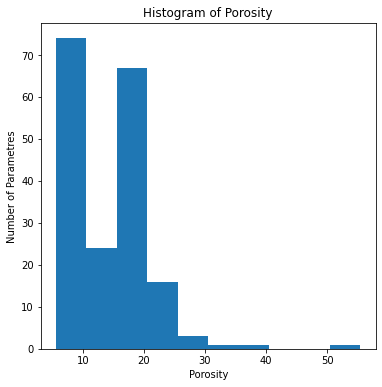

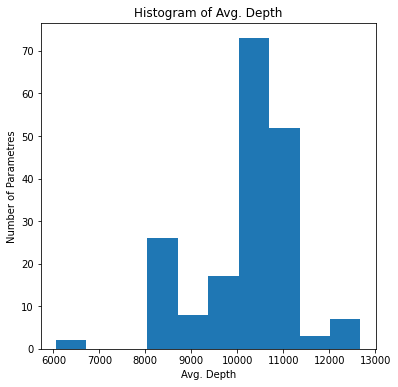

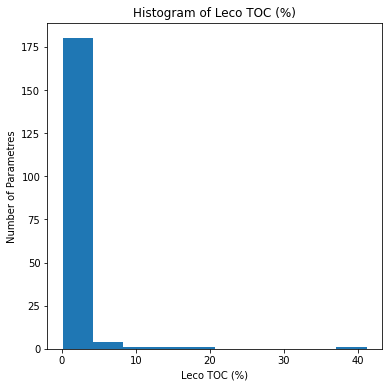

In [16]:
def plot_histogram(mainData, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        mainData[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of Parametres')# Set text for y axis
        plt.show()
        
num_cols = ['GR', 'ILD', 'Porosity','Avg. Depth', 'Leco TOC (%)']    
plot_histogram(mainData, num_cols)

In [17]:
mainData

,Well,CRC Lib #,Formation,Sample Type,GR,ILD,Porosity,HCl Reaction,Avg. Depth,Leco TOC (%),S1,S2,S3,Tmax (°C),HI,OI,S1+S2,PI
0,Buffalo Gap Federal 35-1,T120,FRNR,core,120.992756,17.895352,6.406021,1.0,11029.70,1.90,0.48,2.45,0.16,451.0,129.0,8.0,2.93,0.16
1,Buffalo Gap Federal 35-1,T120,MWRY,core,130.195254,23.630048,8.799609,1.0,11074.70,1.68,0.66,2.49,0.11,452.0,148.0,7.0,3.15,0.21
2,Buffalo Gap Federal 35-1,T120,MWRY,core,138.980399,38.257813,9.401198,1.0,11154.60,0.68,0.58,1.01,0.23,449.0,149.0,34.0,1.59,0.36
3,Buffalo Gap Federal 35-1,T120,MWRY,core,132.187212,51.405548,10.000000,1.0,11161.50,2.89,0.99,5.15,0.25,448.0,178.0,9.0,6.14,0.16
4,Buffalo Gap Federal 35-1,T120,MWRY,core,142.613492,44.098333,7.704591,1.0,11225.15,2.61,2.29,5.48,0.12,448.0,210.0,5.0,7.77,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,3 BITTEROOT STATE,R309,MWRY,core,147.198542,2.533617,55.472478,1.0,8125.50,0.79,0.14,0.73,0.14,438.0,92.0,18.0,0.87,0.16
186,Patrick Walsh Fed.,S601,MWRY,core,122.672031,5.202351,18.448286,1.0,8227.00,5.23,0.93,8.47,0.34,438.0,162.0,7.0,0.10,NaN
187,Patrick Walsh Fed.,S601,MWRY,core,111.375163,6.591240,6.302167,1.0,8239.50,1.47,0.27,1.77,0.21,439.0,120.0,14.0,0.13,NaN
188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Kernel Density Plots

C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


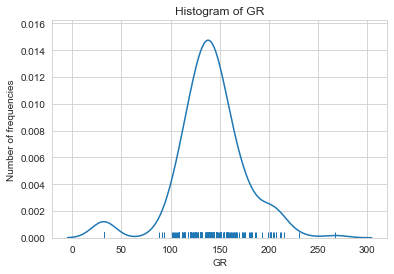

C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


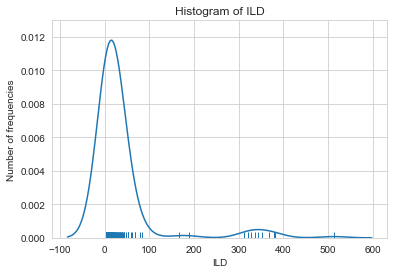

C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


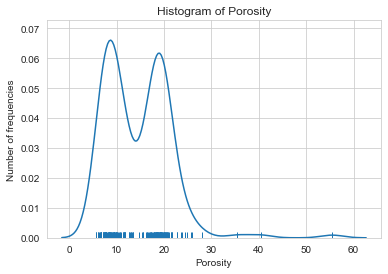

C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


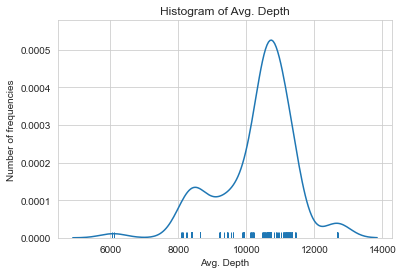

C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


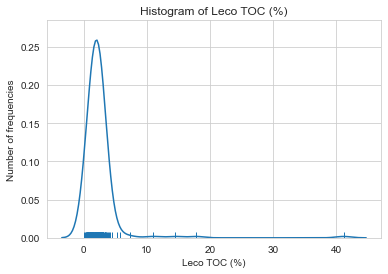

In [18]:
def plot_density_hist(mainData, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(mainData[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of frequencies')# Set text for y axis
        plt.show()
        
plot_density_hist(mainData, num_cols)        

### Core Data Analysis

C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


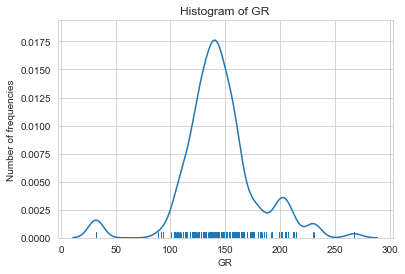

C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


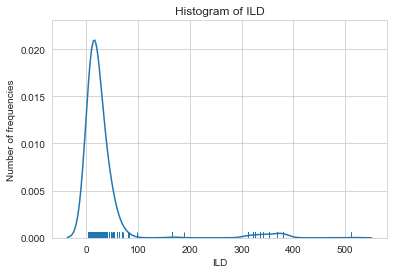

C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


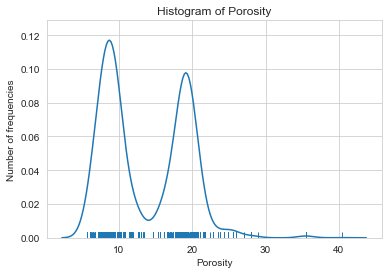

C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


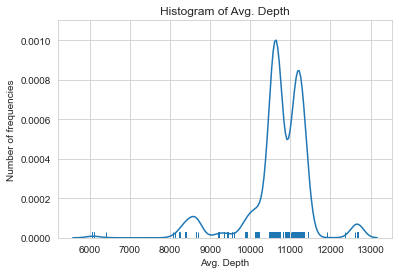

C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


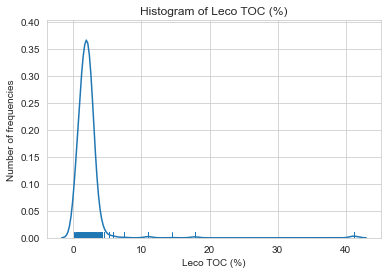

In [19]:
def plot_density_hist(coreData, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(coreData[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of frequencies')# Set text for y axis
        plt.show()
        
plot_density_hist(coreData, num_cols)        

### Relationship between Variables

#### Scatter Plot between variables 

In [20]:
coreData.rename(columns={'Leco TOC (%)':'TOC'},inplace=True)

In [21]:
coreData

,Well,CRC Lib #,Formation,Sample Type,GR,ILD,Porosity,HCl Reaction,Avg. Depth,TOC,S1,S2,S3,Tmax (°C),HI,OI,S1+S2,PI
0,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,0.55,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
1,Buffalo Gap Federal 35-1,T120,MWRY,core,143.767142,28.198080,7.190913,1,11118.1,0.96,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
2,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,0.55,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
3,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,0.55,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
4,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,0.55,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Buffalo Gap Federal 35-1,T120,MWRY,core,199.126202,19.632776,9.900200,1,11183.9,1.13,0.73,1.60,0.10,451.0,142.000000,9.000000,2.33,0.310000
2996,Buffalo Gap Federal 35-1,T120,MWRY,core,206.854685,14.670456,8.408233,1,11320.0,2.61,1.58,4.43,0.22,446.0,170.000000,8.000000,6.01,0.260000
2997,Buffalo Gap Federal 35-1,T120,MWRY,core,157.069571,30.067157,9.500998,1,11343.2,1.77,1.67,1.98,0.33,450.0,112.000000,19.000000,3.65,0.460000
2998,1 FEDERAL,T120,MWRY,core,214.880000,511.917371,23.837823,1,6113.0,7.37,0.31,1.80,0.72,432.0,24.423338,9.769335,2.11,0.146919


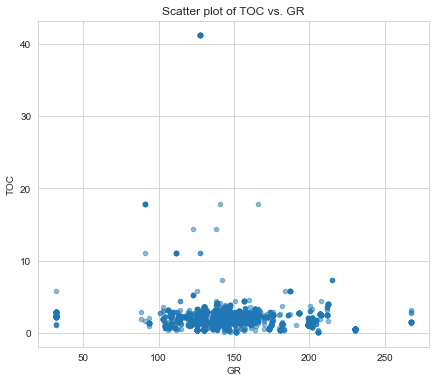

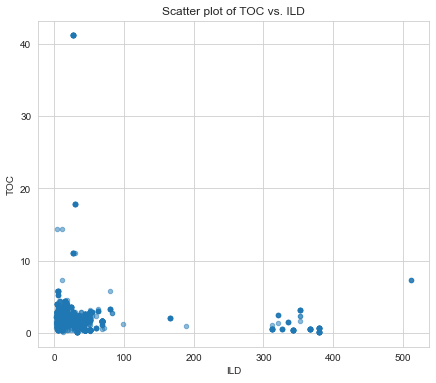

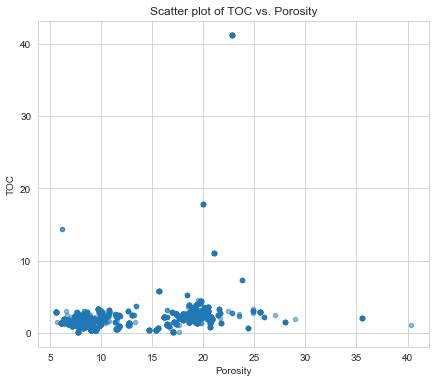

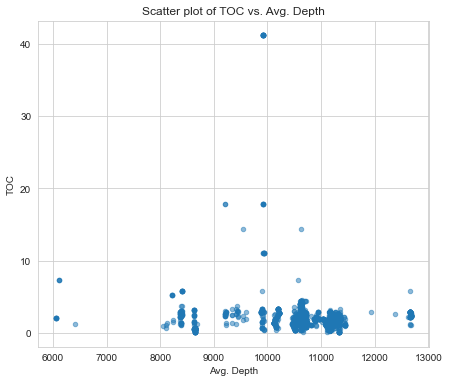

In [22]:
def plot_scatter(coreData, cols, col_y = 'TOC'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        coreData.plot.scatter(x = col, y = col_y, ax = ax,alpha=0.5)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y
                     )# Set text for y axis
        plt.show()

num_cols = ['GR', 'ILD', 'Porosity','Avg. Depth'] 
plot_scatter(coreData, num_cols)        

C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


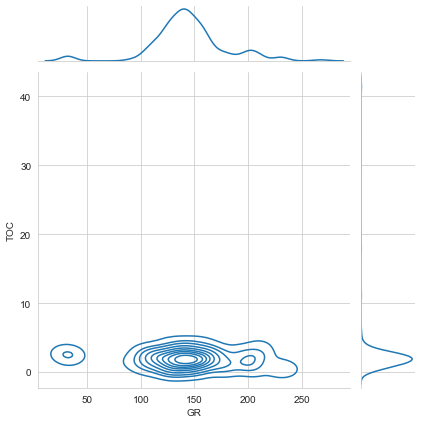

C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


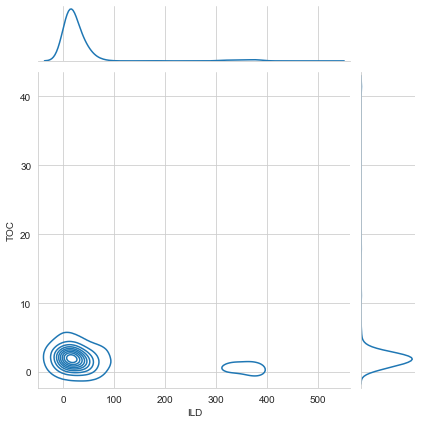

C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


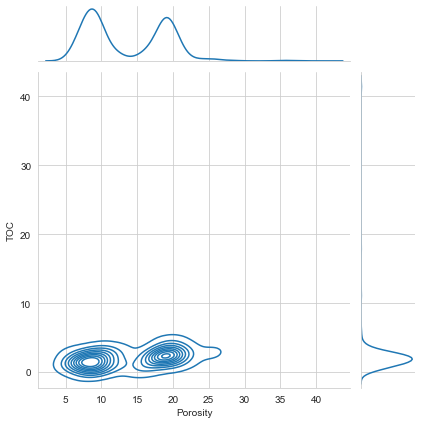

C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


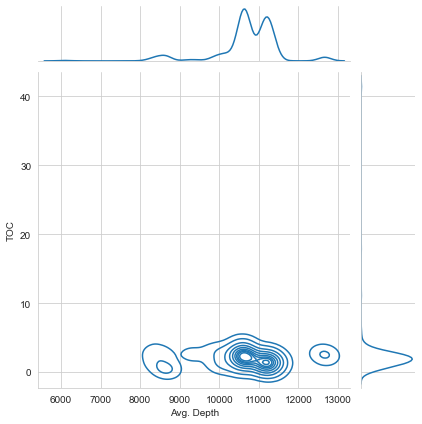

In [23]:
def plot_desity_2d(coreData, cols, col_y = 'TOC', kind ='kde'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=coreData, kind=kind)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

plot_desity_2d(coreData, num_cols)      

#### Box Plots to see outliers

C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


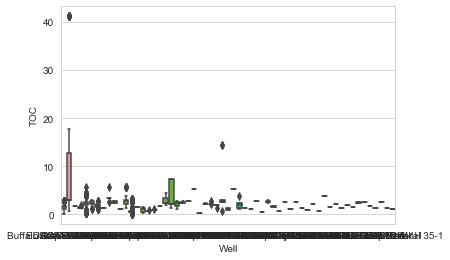

In [24]:
sns.set_style("whitegrid")
sns.boxplot('Well', 'TOC', data=coreData)
plt.xlabel('Well') # Set text for the x axis
plt.ylabel('TOC')# Set text for y axis
plt.show()    

In [25]:
a

NameError: name 'a' is not defined

### Data preparation and cleaning

In [ ]:
coreData

#### treat missing Values 

In [ ]:
(coreData.astype(np.object) == '?').any()

In [ ]:
coreData.dropna(axis=0,inplace=True)

In [26]:
coreData.shape

(3000, 18)

In [27]:
coreData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Well          2999 non-null   object 
 1   CRC Lib #     3000 non-null   object 
 2   Formation     3000 non-null   object 
 3   Sample Type   3000 non-null   object 
 4   GR            3000 non-null   float64
 5   ILD           3000 non-null   float64
 6   Porosity      2999 non-null   float64
 7   HCl Reaction  3000 non-null   int64  
 8   Avg. Depth    3000 non-null   float64
 9   TOC           3000 non-null   float64
 10  S1            2773 non-null   float64
 11  S2            2772 non-null   float64
 12  S3            2775 non-null   float64
 13  Tmax (°C)     2775 non-null   float64
 14  HI            2775 non-null   float64
 15  OI            2775 non-null   float64
 16  S1+S2         3000 non-null   float64
 17  PI            2769 non-null   float64
dtypes: float64(13), int64(1), ob

### Feature engineering and transformation variables

### Removing Outliers

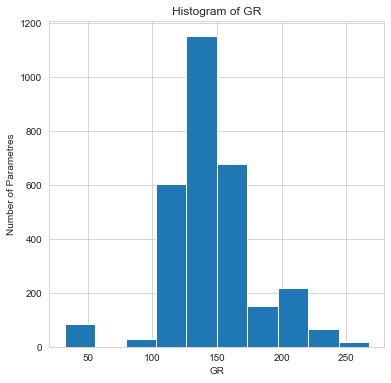

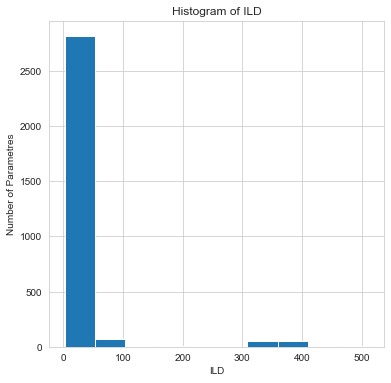

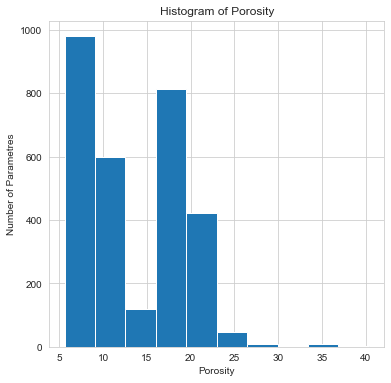

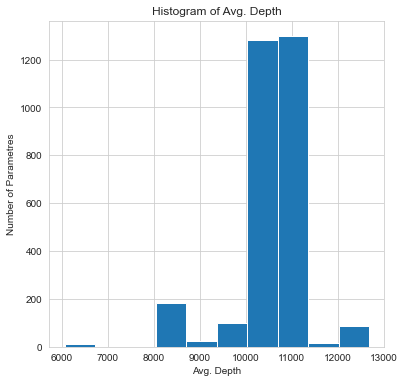

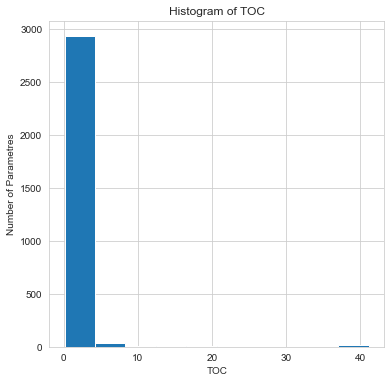

In [28]:
def plot_histogram(coreData, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        coreData[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of Parametres')# Set text for y axis
        plt.show()
        
num_cols = ['GR', 'ILD', 'Porosity','Avg. Depth', 'TOC']    
plot_histogram(coreData, num_cols)

In [29]:
coreData=coreData[coreData['Porosity']<31]

In [31]:
coreData=coreData[(coreData['Avg. Depth']>7000)&(coreData['TOC']<10)&(coreData['ILD']<400)]

In [32]:
coreData.reset_index(inplace=True)

In [33]:
coreData

,index,Well,CRC Lib #,Formation,Sample Type,GR,ILD,Porosity,HCl Reaction,Avg. Depth,TOC,S1,S2,S3,Tmax (°C),HI,OI,S1+S2,PI
0,0,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,0.55,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
1,1,Buffalo Gap Federal 35-1,T120,MWRY,core,143.767142,28.198080,7.190913,1,11118.1,0.96,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
2,2,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,0.55,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
3,3,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,0.55,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
4,4,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,0.55,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,2994,Thunder Creek Fed C-3,S847,MWRY,core,172.978650,379.762935,8.233660,1,8644.0,0.65,0.11,1.20,0.21,439.0,183.0,32.0,1.31,0.08
2947,2995,Buffalo Gap Federal 35-1,T120,MWRY,core,199.126202,19.632776,9.900200,1,11183.9,1.13,0.73,1.60,0.10,451.0,142.0,9.0,2.33,0.31
2948,2996,Buffalo Gap Federal 35-1,T120,MWRY,core,206.854685,14.670456,8.408233,1,11320.0,2.61,1.58,4.43,0.22,446.0,170.0,8.0,6.01,0.26
2949,2997,Buffalo Gap Federal 35-1,T120,MWRY,core,157.069571,30.067157,9.500998,1,11343.2,1.77,1.67,1.98,0.33,450.0,112.0,19.0,3.65,0.46


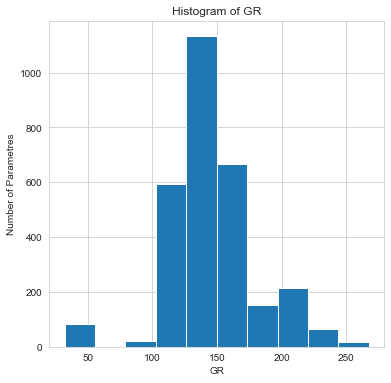

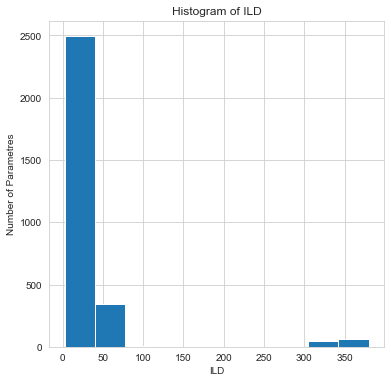

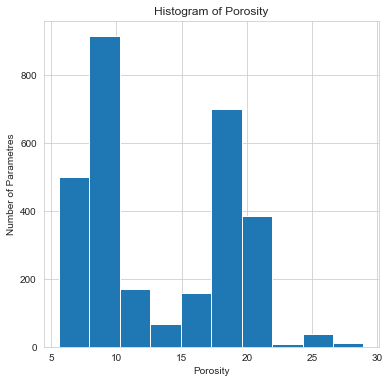

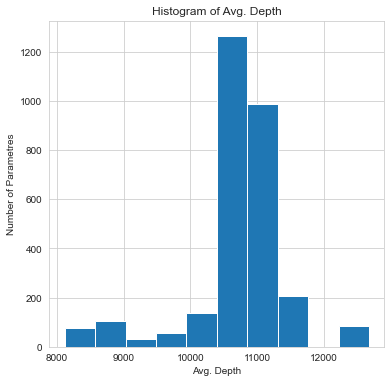

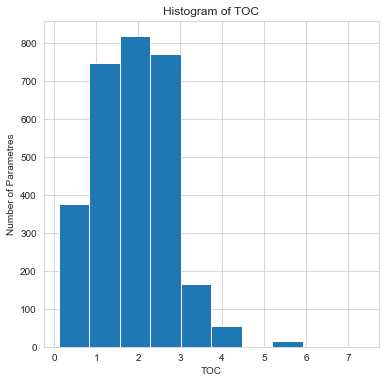

In [34]:
def plot_histogram(coreData, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        coreData[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of Parametres')# Set text for y axis
        plt.show()
        
num_cols = ['GR', 'ILD', 'Porosity','Avg. Depth', 'TOC']    
plot_histogram(coreData, num_cols)

In [35]:
coreData=coreData[coreData['ILD']<300]

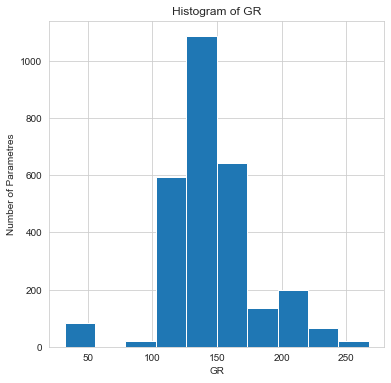

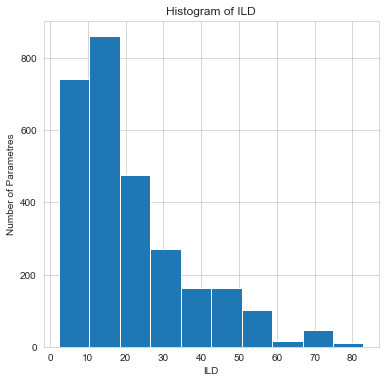

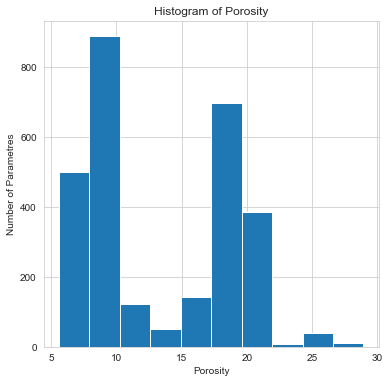

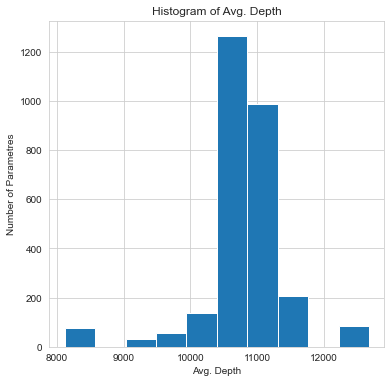

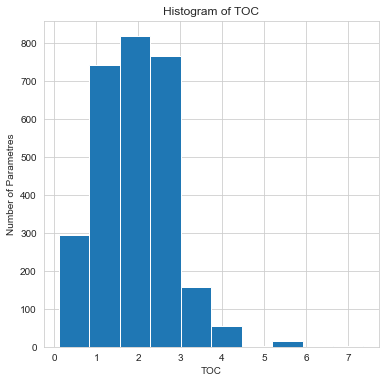

In [36]:
def plot_histogram(coreData, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        coreData[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of Parametres')# Set text for y axis
        plt.show()
        
num_cols = ['GR', 'ILD', 'Porosity','Avg. Depth', 'TOC']    
plot_histogram(coreData, num_cols)

### Transforming Numerical Variables

C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


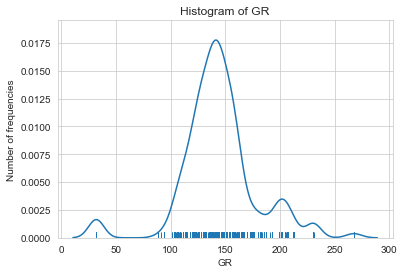

C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


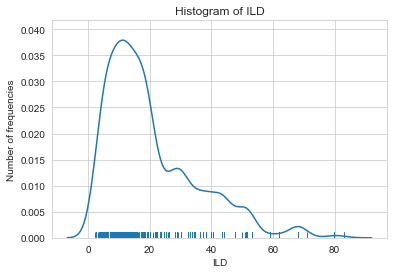

C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


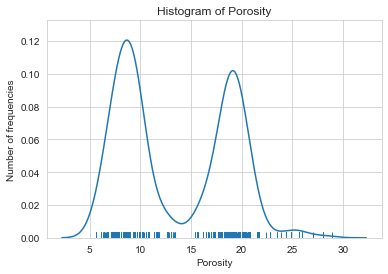

C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


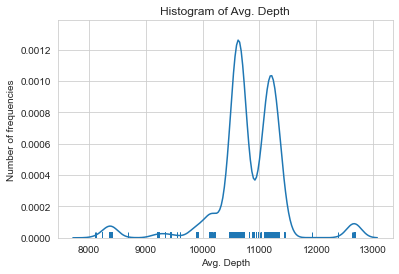

C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


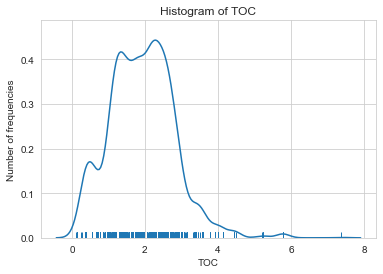

In [37]:
def plot_density_hist(coreData, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(coreData[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of frequencies')# Set text for y axis
        plt.show()
        
plot_density_hist(coreData, num_cols)  

C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


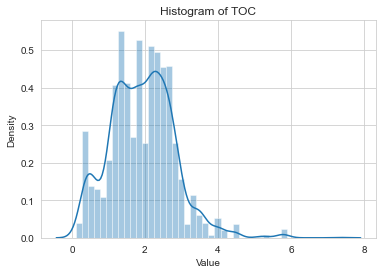

In [38]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(auto_prices['price'])
hist_plot(coreData['TOC'], 'TOC')

<ipython-input-39-29556f28601d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coreData['log_TOC'] = np.log(coreData['TOC'])
C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


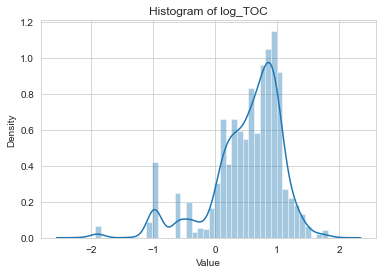

In [39]:
coreData['log_TOC'] = np.log(coreData['TOC'])
hist_plot(coreData['log_TOC'], 'log_TOC')

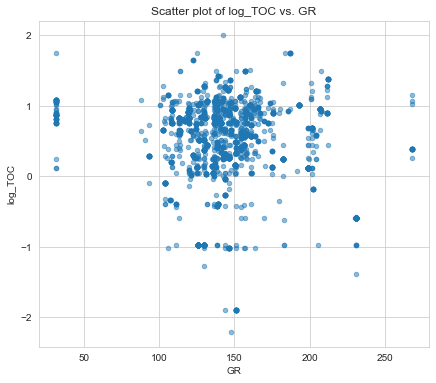

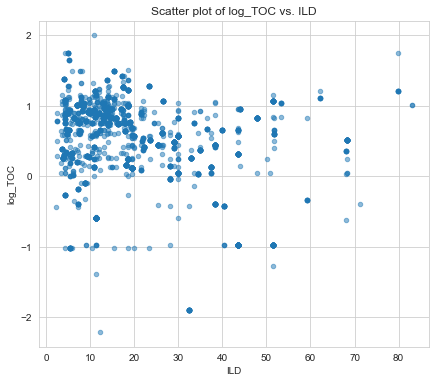

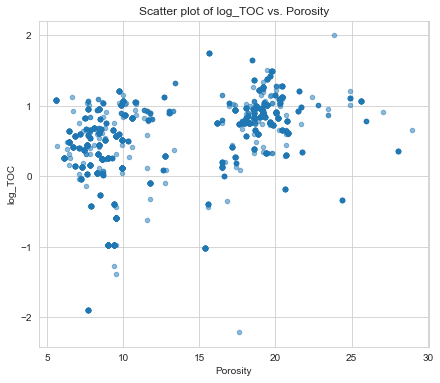

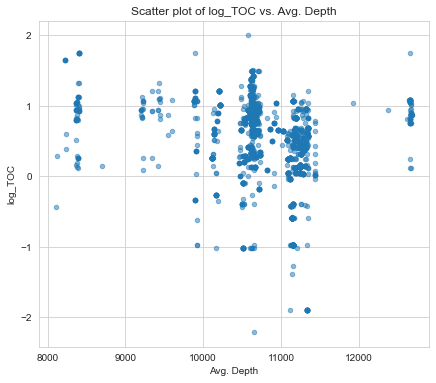

In [40]:
def plot_scatter(coreData, cols, col_y = 'log_TOC'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        coreData.plot.scatter(x = col, y = col_y, ax = ax,alpha=0.5)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y
                     )# Set text for y axis
        plt.show()

num_cols = ['GR', 'ILD', 'Porosity','Avg. Depth'] 
plot_scatter(coreData, num_cols) 

In [41]:
import math
coreData[['log_GR', 'log_ILD', 'log_Porosity','log_Avg. Depth']] = coreData[['GR', 'ILD', 'Porosity','Avg. Depth']].applymap(math.log)

<ipython-input-41-5c22f2532f1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coreData[['log_GR', 'log_ILD', 'log_Porosity','log_Avg. Depth']] = coreData[['GR', 'ILD', 'Porosity','Avg. Depth']].applymap(math.log)
<ipython-input-41-5c22f2532f1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coreData[['log_GR', 'log_ILD', 'log_Porosity','log_Avg. Depth']] = coreData[['GR', 'ILD', 'Porosity','Avg. Depth']].applymap(math.log)
<ipython-input-41-5c22f2532f1d>:2: SettingWithCopyWarning: 
A value is trying to

C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


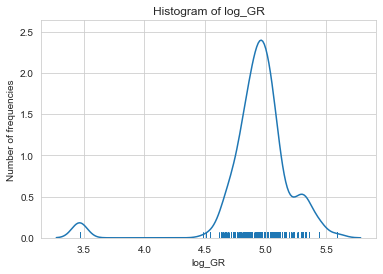

C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


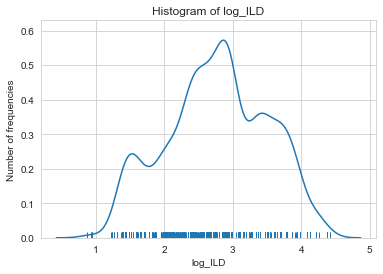

C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


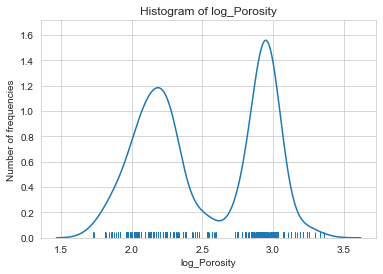

C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


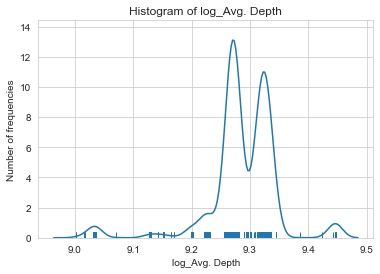

In [42]:
num_cols=['log_GR', 'log_ILD', 'log_Porosity','log_Avg. Depth']

def plot_density_hist(coreData, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(coreData[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of frequencies')# Set text for y axis
        plt.show()
        
plot_density_hist(coreData, num_cols)  

## Case 1 Model in Predicting TOC -Linear Regression

### load the Datasets

In [43]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

In [44]:
coreData

,index,Well,CRC Lib #,Formation,Sample Type,GR,ILD,Porosity,HCl Reaction,Avg. Depth,...,Tmax (°C),HI,OI,S1+S2,PI,log_TOC,log_GR,log_ILD,log_Porosity,log_Avg. Depth
0,0,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,...,NaN,NaN,NaN,0.00,NaN,-0.597837,5.440184,2.439776,2.251397,9.318755
1,1,Buffalo Gap Federal 35-1,T120,MWRY,core,143.767142,28.198080,7.190913,1,11118.1,...,NaN,NaN,NaN,0.00,NaN,-0.040822,4.968195,3.339254,1.972818,9.316330
2,2,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,...,NaN,NaN,NaN,0.00,NaN,-0.597837,5.440184,2.439776,2.251397,9.318755
3,3,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,...,NaN,NaN,NaN,0.00,NaN,-0.597837,5.440184,2.439776,2.251397,9.318755
4,4,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,...,NaN,NaN,NaN,0.00,NaN,-0.597837,5.440184,2.439776,2.251397,9.318755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,2993,Thunder Creek Fed C-3,S847,MWRY,core,154.693838,2.399435,9.510249,1,8114.0,...,441.0,61.0,14.0,1.31,0.23,-0.430783,5.041448,0.875233,2.252370,9.001346
2947,2995,Buffalo Gap Federal 35-1,T120,MWRY,core,199.126202,19.632776,9.900200,1,11183.9,...,451.0,142.0,9.0,2.33,0.31,0.122218,5.293939,2.977200,2.292555,9.322231
2948,2996,Buffalo Gap Federal 35-1,T120,MWRY,core,206.854685,14.670456,8.408233,1,11320.0,...,446.0,170.0,8.0,6.01,0.26,0.959350,5.332017,2.685836,2.129211,9.334326
2949,2997,Buffalo Gap Federal 35-1,T120,MWRY,core,157.069571,30.067157,9.500998,1,11343.2,...,450.0,112.0,19.0,3.65,0.46,0.570980,5.056689,3.403433,2.251397,9.336374


In [46]:
coreData.columns

Index(['index', 'Well', 'CRC Lib #', 'Formation', 'Sample Type', 'GR', 'ILD',
       'Porosity', 'HCl Reaction', 'Avg. Depth', 'TOC', 'S1 ', 'S2 ', 'S3',
       'Tmax (°C)', 'HI', 'OI', 'S1+S2', 'PI', 'log_TOC', 'log_GR', 'log_ILD',
       'log_Porosity', 'log_Avg. Depth'],
      dtype='object')

In [47]:
coreDataPrepared=coreData[['GR','ILD','Porosity','Avg. Depth','TOC']]

In [49]:
coreDataPrepared.to_csv(r'C:\Users\eobasi\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\MowryCoreDataFiles\coreDataPrepared.csv',index=False,header=True)

In [17]:
import matplotlib as mpl

In [27]:
coreData[[Leco TOC (%)]]

,Well,CRC Lib #,Formation,Sample Type,GR,ILD,Porosity,HCl Reaction,Avg. Depth,Leco TOC (%),S1,S2,S3,Tmax (°C),HI,OI,S1+S2,PI
0,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,0.55,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
1,Buffalo Gap Federal 35-1,T120,MWRY,core,143.767142,28.198080,7.190913,1,11118.1,0.96,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
2,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,0.55,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
3,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,0.55,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
4,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,0.55,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Buffalo Gap Federal 35-1,T120,MWRY,core,199.126202,19.632776,9.900200,1,11183.9,1.13,0.73,1.60,0.10,451.0,142.000000,9.000000,2.33,0.310000
2996,Buffalo Gap Federal 35-1,T120,MWRY,core,206.854685,14.670456,8.408233,1,11320.0,2.61,1.58,4.43,0.22,446.0,170.000000,8.000000,6.01,0.260000
2997,Buffalo Gap Federal 35-1,T120,MWRY,core,157.069571,30.067157,9.500998,1,11343.2,1.77,1.67,1.98,0.33,450.0,112.000000,19.000000,3.65,0.460000
2998,1 FEDERAL,T120,MWRY,core,214.880000,511.917371,23.837823,1,6113.0,7.37,0.31,1.80,0.72,432.0,24.423338,9.769335,2.11,0.146919


<ipython-input-43-30246f72e5ce>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('hist.png',dpi=300,bbox_inches='tight',quality=99)


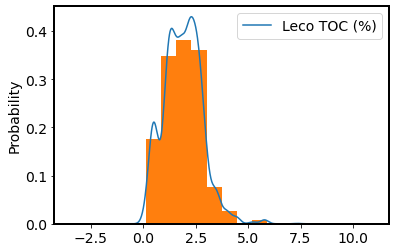

In [43]:
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 2
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
coreData['Leco TOC (%)'].plot.kde(ax=ax, legend=True, )
coreData['Leco TOC (%)'].plot.hist(density=True, ax=ax,)
ax.set_ylabel('Probability')
#ax.grid(axis='y')
#ax.set_facecolor('#d8dcd6')
plt.savefig('hist.png',dpi=300,bbox_inches='tight',quality=99)
plt.show()

<ipython-input-41-df0f12ddf9f5>:24: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  axs.grid(b = True, color ='grey',


NameError: name 'legend' is not defined

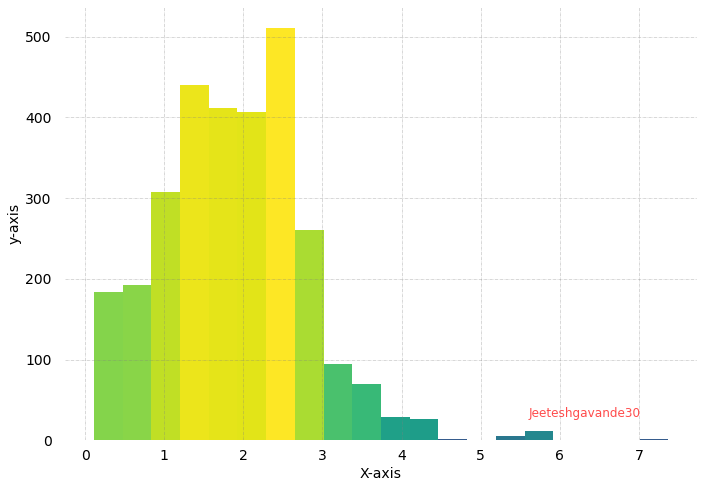

In [41]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)
 
# Remove x, y ticks
axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')
   
# Add padding between axes and labels
axs.xaxis.set_tick_params(pad = 5)
axs.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)
 
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30',
         fontsize = 12,
         color ='red',
         ha ='right',
         va ='bottom',
         alpha = 0.7)
 
# Creating histogram
N, bins, patches = axs.hist(coreData['Leco TOC (%)'], bins = 20)
 
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
 
# Adding extra features   
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.legend(legend)
plt.title('Customized histogram')
 
# Show plot
plt.show()